## Ridge, Lasso regression

The main difference between `Linear`, `Ridge` and `Lasso` regression is in the way how it fits the data. Whereas `Linear` model fits the data by minimizing the sum of the squared residuals, the `Ridge` and `Lasso` models fits the data by minimizing the sum of residuals plus penalty term. Penalty term can be simply tuned by weight parameter `Lambda` (sometimes also called `Alpha`).

<div style="display: flex; justify-content: center;">
<img src="./images/Regression.png" alt="Flower" style="width:1000px;"/></div>

$$ \text{Linear regression :} \qquad \min\left( \sum_{i=1} (y(x_i) - y_i)^2 \right) $$
$$ \text{Ridge regression :} \qquad \min\left( \lambda\cdot k^2 + \sum_{i=1} (y(x_i) - y_i)^2 \right) = \min\left( \lambda\cdot k^2 + MSE \right) $$
$$ \text{Lasso regression :} \qquad \min\left( \lambda\cdot |k| + \sum_{i=1} (y(x_i) - y_i)^2 \right) = \min\left( \lambda\cdot |k| + MSE \right), $$

where `k` is the slope of resulted regression line, `MSE` is the Mean Squared Error and `y(x)` is the regression function evaluated. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("home_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = np.array(df["sqft_living"])
y = np.array(df["price"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print(X_train)

[1420 1750 2880 ... 1710 1050 1650]


### Linear regression

In [77]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train.reshape(-1, 1), y_train)

slope, bias = np.round(lin_model.coef_[0]), np.round(lin_model.intercept_)
lin_pred = lin_model.predict(X_test.reshape(-1, 1)) 
lin_mse = mean_squared_error(y_test, lin_pred)

### Ridge regression

In [79]:
from sklearn.linear_model import Ridge

alpha_parameter = 10e9
ridge_model = Ridge(alpha=alpha_parameter)
ridge_model.fit(X_train.reshape(-1, 1), y_train)

r_slope, r_bias = np.round(ridge_model.coef_[0]), np.round(ridge_model.intercept_)
r_pred = ridge_model.predict(X_test.reshape(-1, 1)) 

77195349506.63112

### Comparison of Ridge (Green) and Linear (Red) regression

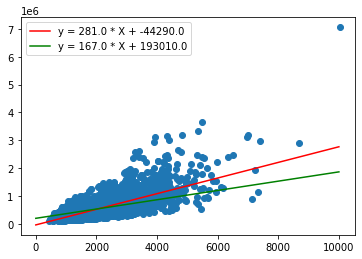

In [69]:
x_axis = np.arange(0, 10000, 1)
l_line = bias + slope * x_axis
r_line = r_bias + r_slope * x_axis

plt.scatter(X_test, y_test)
plt.plot(x_axis, l_line, c="r", label=f"y = {slope} * X + {bias}")
plt.plot(x_axis, r_line, c="g", label=f"y = {r_slope} * X + {r_bias}")
plt.legend()

We can see that `alpha` parameter has visible influence on the slope of the regression line.

Text(0.5, 1.0, 'Minimal MSE value: 67006423276.44548')

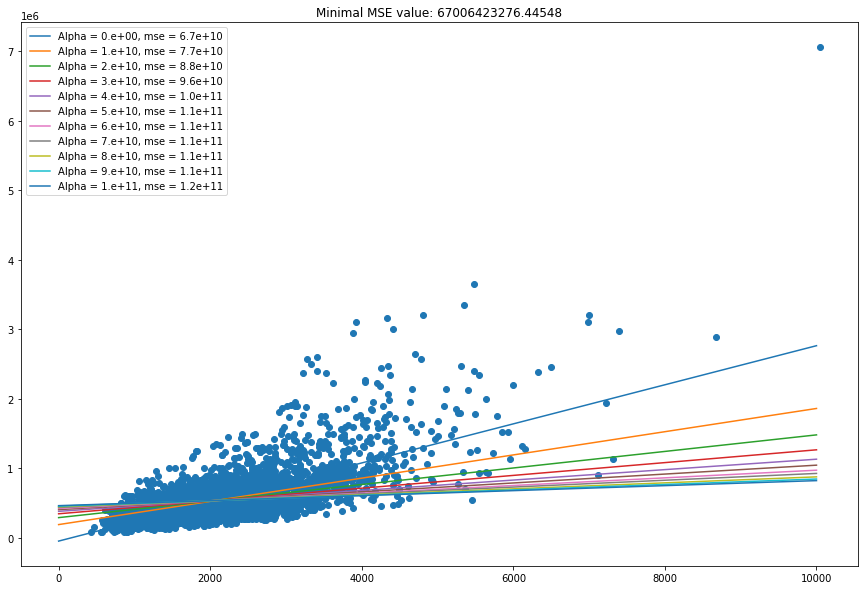

In [159]:
x_ax = np.linspace(0, 10000, 100)
alpha_parameters = np.linspace(0, 1e11, 101)
r_mses = []
slopes = []
residua = []

plt.figure(figsize=(15,10))
plt.scatter(X_test, y_test)

for idx, alpha in enumerate(alpha_parameters):
    if (idx % 10 != 0):
        continue
    else:
        ridge_model = Ridge(alpha=alpha)
        ridge_model.fit(X_train.reshape(-1, 1), y_train)

        r_slope, r_bias = np.round(ridge_model.coef_[0]), np.round(ridge_model.intercept_)
        r_pred = ridge_model.predict(X_test.reshape(-1, 1)) 
        r_mse = mean_squared_error(y_test, r_pred)

        slopes.append(r_slope)
        residua.append(r_mse)
        
        r_mses.append(r_mse)
        line = r_bias + x_ax * r_slope
        plt.plot(x_ax, line, label=f"Alpha = {np.format_float_scientific(alpha, precision=1)}, mse = {np.format_float_scientific(r_mse, precision=1)}")
plt.legend()
plt.title(f"Minimal MSE value: {np.min(r_mses)}")

On the plot above we can see many different regression lines for many different values of `alpha` parameter. Also we can see the `mse` values (mean squared error) which tends to be higher as we increase the value of `alpha`. Interesting is the dependence between actual `slope` of the regression line and value of `mse`. This relationship can be seen below.

Text(0, 0.5, 'R_MSE')

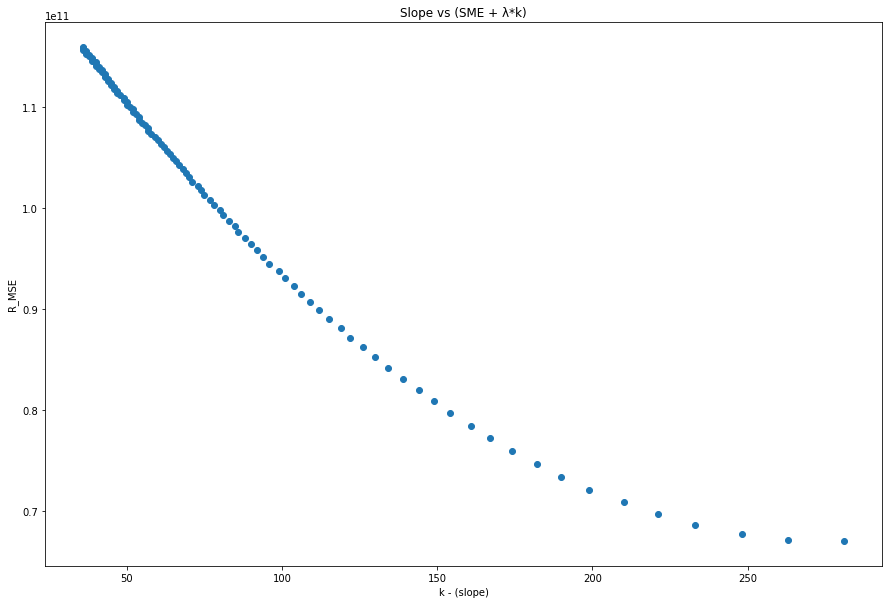

In [154]:
plt.figure(figsize=(15,10))
plt.scatter(slopes, residua)
plt.title("Slope vs (SME + λ*k)")
plt.xlabel("k - (slope)")
plt.ylabel("R_MSE")